In [1]:
import pandas as pd

In [2]:
ligas_europ=pd.read_csv('Lligues europees UEFA.csv',
                        encoding = "ISO-8859-1", sep = ";")

# Limpieza de datos y Análisis exploratorio

In [3]:
ligas_europ

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


Dataset compuesto por 30 filas y 21 columnas.

### Columnas

In [4]:
# Lista de las columnas (variables) existentes en el dataset.

ligas_europ.columns.tolist()

['Rk',
 'Squad',
 'Country',
 'LgRk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'Pts',
 'Pts/G',
 'xG',
 'xGA',
 'xGD',
 'xGD/90',
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper']

 #### Descripción de las variables   
    
    RK: ranking UEFA del equipo.
    Squad: nombre del equipo.
    Country: país del equipo.
    LgRk: posición del equipo al final de su competición nacional.
    MP: partidos jugados en la temporada.
    W: partidos ganados.
    D: partidos empatados.
    L: partidos perdidos.
    GF: goles a favor.
    GA: goles en contra.
    GD: diferencia de goles.
    Pts: puntos logrados.
    Pts/G: promedio de puntos obtenidos por partido.
    xG: goles esperados.
    xGA: goles en contra esperados.
    xGD: diferencia entre los goles marcados y en contra esperados.
    xGD/90: goles esperados por partido.
    Last 5: resultado de los últimos 5 partidos (ganados = 'W', empatados = 'D' y perdidos = 'L').
    Attendance: número de asistencias medias.
    Top Team Scorer: nombre del goleador y cantidad de goles.
    Goalkeeper: nombre del portero.


In [275]:
# Renombrar columnas (traducido).

ligas_europ = ligas_europ.rename(columns={'Rk': 'RkUEFA','Squad':'Equipo', 'Country': 'País', 'LgRk': 'RkLiga', 'MP': 'PJ', 'W': 'G', 'D': 'E', 'L': 'P',
                                            'GA': 'GC', 'xGA': 'xGC', 'Last 5':'Últimos 5', 'Attendance': 'Asistencia media', 
                                            'Top Team Scorer': 'Máximo goleador del equipo'})
ligas_europ.columns.tolist()

['RkUEFA',
 'Equipo',
 'País',
 'RkLiga',
 'PJ',
 'G',
 'E',
 'P',
 'GF',
 'GC',
 'GD',
 'Pts',
 'Pts/G',
 'xG',
 'xGC',
 'xGD',
 'xGD/90',
 'Últimos 5',
 'Asistencia media',
 'Nombre máximo goleador',
 'Goles máximo goleador']

Se elimina la columna de 'Goalkeeper', no aportará información relevante para con nuestro futuro trabajo sobre el dataset.


In [6]:
# Eliminación de columnas no necesarias según la finalidad del trabajo a realizar sobre el dataset

ligas_europ.drop(['Goalkeeper'], axis=1, inplace=True)


In [8]:
# Dataframe sin columna 'Goalkeeper'

ligas_europ

,RkUEFA,Equipo,País,RkLiga,PJ,G,E,P,GF,GC,GD,Pts,Pts/G,xG,xGC,xGD,xGD/90,Últimos 5,Asistencia media,Máximo goleador del equipo
0,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15
1,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11
94,95,Venezia,ITA,20,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9
95,96,Watford,ENG,19,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10
96,97,Norwich City,ENG,20,37,5,7,25,23,79,-56,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11


In [9]:
# División en dos nuevas columnas la variable 'Máximo goleador del equipo' y así distiguir nombre y números.

ligas_europ[['Nombre máximo goleador','Goles máximo goleador']] = ligas_europ['Máximo goleador del equipo'].str.split(' - ', n=1, expand=True)

# Eliminación de la columna  dividida
ligas_europ = ligas_europ.drop(columns=['Máximo goleador del equipo'])

ligas_europ

,RkUEFA,Equipo,País,RkLiga,PJ,G,E,P,GF,GC,...,Pts,Pts/G,xG,xGC,xGD,xGD/90,Últimos 5,Asistencia media,Nombre máximo goleador,Goles máximo goleador
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne,15
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah,22
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema,27
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski,35
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo,11
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry,9
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis,10
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki,11


### Cambio tipo de valores

In [10]:
ligas_europ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RkUEFA                  98 non-null     int64  
 1   Equipo                  98 non-null     object 
 2   País                    98 non-null     object 
 3   RkLiga                  98 non-null     int64  
 4   PJ                      98 non-null     int64  
 5   G                       98 non-null     int64  
 6   E                       98 non-null     int64  
 7   P                       98 non-null     int64  
 8   GF                      98 non-null     int64  
 9   GC                      98 non-null     int64  
 10  GD                      98 non-null     int64  
 11  Pts                     98 non-null     int64  
 12  Pts/G                   98 non-null     float64
 13  xG                      98 non-null     float64
 14  xGC                     98 non-null     floa

In [11]:
ligas_europ.isna().sum()

RkUEFA                    0
Equipo                    0
País                      0
RkLiga                    0
PJ                        0
G                         0
E                         0
P                         0
GF                        0
GC                        0
GD                        0
Pts                       0
Pts/G                     0
xG                        0
xGC                       0
xGD                       0
xGD/90                    0
Últimos 5                 0
Asistencia media          0
Nombre máximo goleador    0
Goles máximo goleador     0
dtype: int64

#### Observaciones:

No existen valores nulos. Por otra parte, y según el tipo de datos para cada variable, solo será necesario cambiar los valores pertenecientes a 'Goles máximo goleador', del tipo 'objeto' a tipo 'entero'

In [12]:
# Cambio a formato numérico

ligas_europ['Goles máximo goleador'] = ligas_europ['Goles máximo goleador'].astype(int)


print('Ahora los valores de la variable "Goles máximo goleador" tienen un formato', ligas_europ['Goles máximo goleador'].dtypes)

Ahora los valores de la variable "Goles máximo goleador" tienen un formato int32


### Comprobación de registros duplicados

In [13]:
ligas_europ.duplicated().sum()

0

In [14]:


ligas_europ[ligas_europ.duplicated()].count()

RkUEFA                    0
Equipo                    0
País                      0
RkLiga                    0
PJ                        0
G                         0
E                         0
P                         0
GF                        0
GC                        0
GD                        0
Pts                       0
Pts/G                     0
xG                        0
xGC                       0
xGD                       0
xGD/90                    0
Últimos 5                 0
Asistencia media          0
Nombre máximo goleador    0
Goles máximo goleador     0
dtype: int64

No existen registros duplicados

In [15]:
ligas_europ.nunique()

RkUEFA                    98
Equipo                    98
País                       5
RkLiga                    20
PJ                         3
G                         25
E                         13
P                         24
GF                        47
GC                        48
GD                        61
Pts                       52
Pts/G                     61
xG                        87
xGC                       88
xGD                       91
xGD/90                    77
Últimos 5                 80
Asistencia media          98
Nombre máximo goleador    98
Goles máximo goleador     21
dtype: int64

## Análisis exploratorio

In [16]:
# Tabla resumen estadístico del dataset

ligas_europ.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
RkUEFA,98.0,49.50,28.43,1.00,25.25,49.50,73.75,98.00
RkLiga,98.0,10.32,5.71,1.00,5.25,10.00,15.00,20.00
PJ,98.0,36.31,1.15,34.00,36.00,37.00,37.00,37.00
G,98.0,13.45,5.75,3.00,9.00,13.00,17.00,28.00
E,98.0,9.41,2.90,3.00,7.00,9.00,11.00,16.00
P,98.0,13.45,5.12,2.00,10.00,13.00,17.00,26.00
GF,98.0,50.88,16.10,23.00,39.00,47.00,60.00,97.00
GC,98.0,50.88,13.63,24.00,40.00,50.00,59.00,89.00
GD,98.0,0.00,26.50,-56.00,-17.75,-1.00,17.25,72.00
Pts,98.0,49.73,16.17,18.00,37.00,46.00,61.75,90.00


C:\Users\Ronald\AppData\Local\Temp\ipykernel_5168\70754030.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ligas_europ.corr(), cmap='seismic', linewidths=0.7, annot=True)


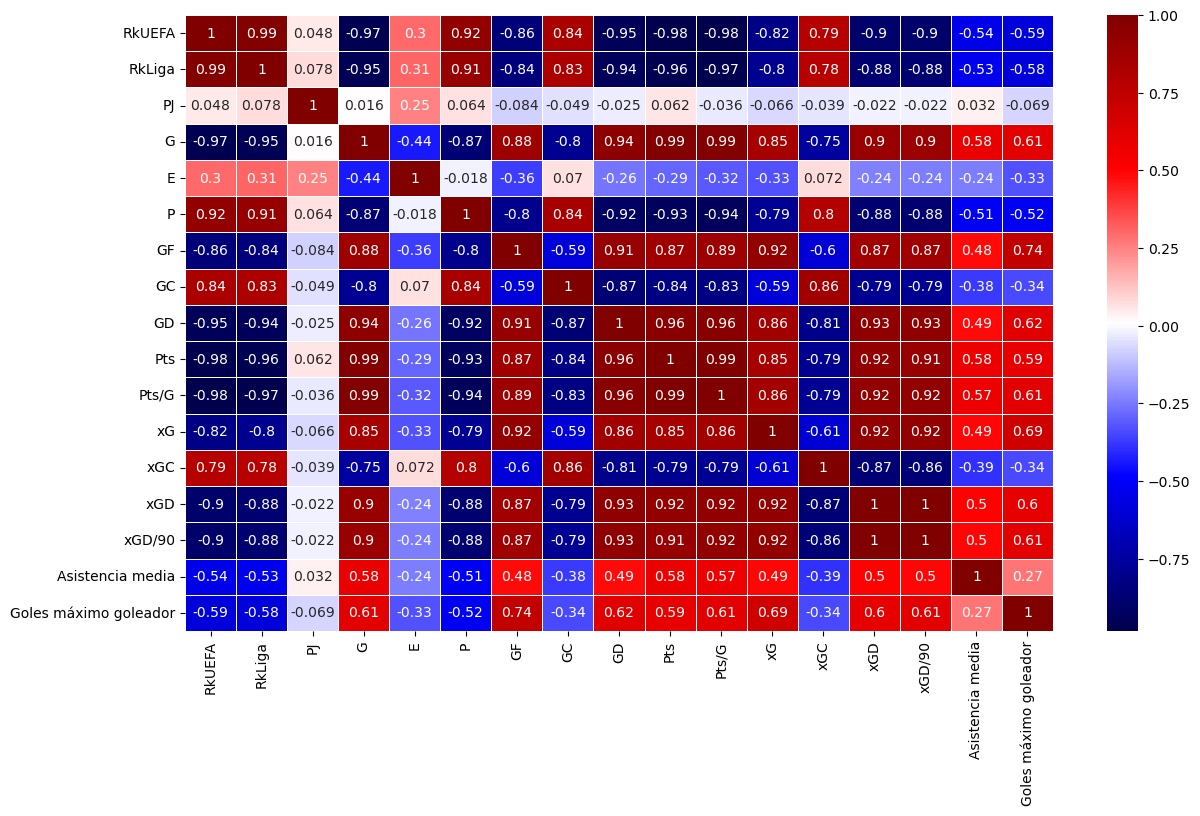

In [17]:
# Mapa de calor de las correlaciones entre las diferentes variables numéricas

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.heatmap(ligas_europ.corr(), cmap='seismic', linewidths=0.7, annot=True)

plt.show()

# Ejercicio 1

    Comprobación si la muestra tiene una distrubición gaussiana mediante un test de normalidad con la prueba de ShapiroWilk.

    H0: la hipótesis nula tiene una distribución normal
    H0: la hipótesis nula No tiene una distribución normal


In [18]:
from scipy.stats import shapiro

stat, p_valor = shapiro(ligas_europ['Goles máximo goleador'])
print('stat=%.3f, p=%.3f' % (stat, p_valor))

alpha = 0.05
if p_valor > alpha:
    print('La muestra Sí tiene una distribución gaussiana.\n'
    f'P valor ({p_valor}) por encima del valor Alpha ({alpha}).\n'
    'Se acepta la hipótesis nula y se rechaza la hipótesis alternativa.')
else: 
    print('La muestra NO tiene una distribución gaussiana.\n'
    f'P valor ({p_valor}) está por debajo del valor Alpha ({alpha}).\n'
    'Se rechaza la hipótesis nula y se acepta la hipótesis alternativa.')
 


stat=0.883, p=0.000
La muestra NO tiene una distribución gaussiana.
P valor (3.1276934464585793e-07) está por debajo del valor Alpha (0.05).
Se rechaza la hipótesis nula y se acepta la hipótesis alternativa.


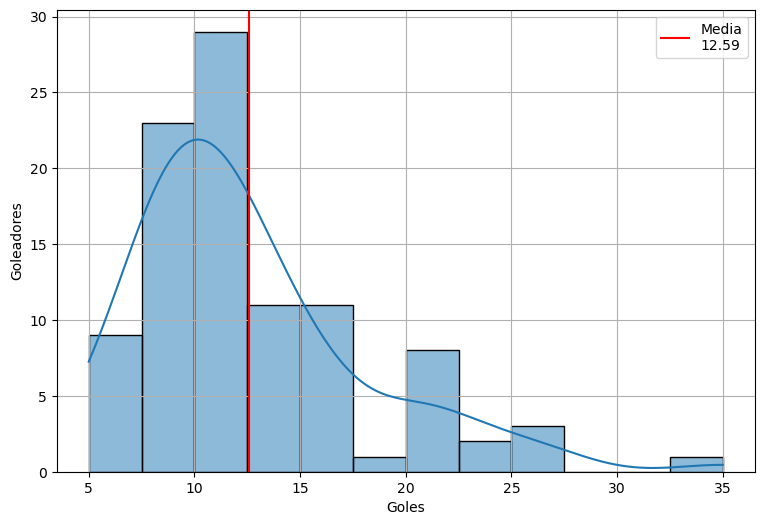

In [52]:
# Visualización de la no existencia de una campana de Gauss

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))

sns.histplot(ligas_europ['Goles máximo goleador'], kde=True)
plt.axvline(ligas_europ['Goles máximo goleador'].mean(), color='red', label=f'Media\n{med.rou}')

plt.ylabel('Goleadores')
plt.xlabel('Goles')
plt.legend()
plt.grid()

plt.show()



In [20]:
ligas_europ[ligas_europ['Goles máximo goleador']>30]

,RkUEFA,Equipo,País,RkLiga,PJ,G,E,P,GF,GC,...,Pts,Pts/G,xG,xGC,xGD,xGD/90,Últimos 5,Asistencia media,Nombre máximo goleador,Goles máximo goleador
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.5,W W L D D,33176,Robert Lewandowski,35


#### Observaciones:
Los valores no tienen una distribución normal, solo hay un jugador por encima de los 30 goles marcados. La mayoría de los jugadores están entre un rango de 7.5 y 17.5 goles. Muy pocos son los que están por encima de 20.

# Ejercicio 2
## Con dos atributos calcular el valor P y si se rechaza la Hipótesis Nula con alpha de 5%

### Coeficiente de correlación de Pearson

Con esta prueba se pretende verificar si dos muestras están relacionadas. En este caso seran las dos variables 'Partidos perdidos' y 'Goles en contra'

Se comprobará si las dos variables tienen una relación lineal.

H0: las dos muestras son independientes.

H1: existe una dependencia entre las muestras.

In [55]:
# Test de Correlación de Pearson

from scipy.stats import pearsonr

stat, p = pearsonr(ligas_europ['GC'], ligas_europ['P'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente independiente')
else:
 print('Probablemente dependiente')

stat=0.842, p=0.000
Probablemente dependiente


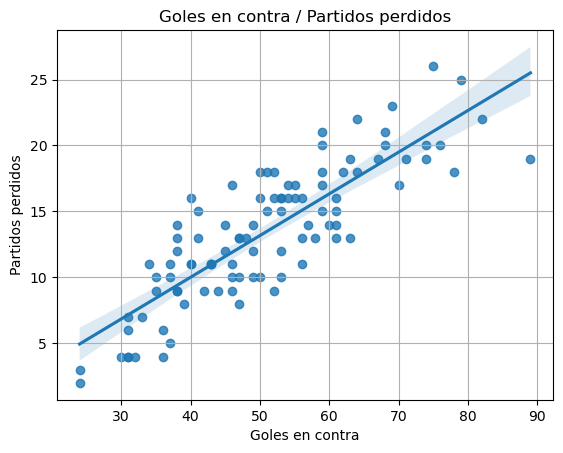

In [274]:
# Gráfico para visualizar la correlación entre las dos variables

sns.regplot(x=ligas_europ['GC'], y=ligas_europ['P'])
plt.title('Goles en contra / Partidos perdidos')
plt.xlabel('Goles en contra')
plt.ylabel('Partidos perdidos')
plt.grid()
plt.show()



Se puede ver que existe una considerable relación entre las dos variables elegidas, cuantos más goles son los recibidos, los partidos perdidos aumentan.

# Ejercicio 3

## Con tres atributos calcular el valor P y si se rechaza la Hipótesis Nula con alpha de 5%

Con esta prueba se pretende comprobar si tres muestras están relacionadas. Para este caso, se usarán las tres variables 'Goles en contra España', 'Goles a favor Francia y 'Puntos ligas en europa', las cuales serán creadas a continuación.

Se comprobará si las tres variables tienen una media similar.

H0: las medias de las muestras son iguales.

H1: una o más de las medias de las muestras son desiguales.

In [134]:
ligas_europ.País.unique()

array(['ENG', 'ESP', 'GER', 'FRA', 'ITA'], dtype=object)

In [273]:
# Creación de la variables sobre las columnas que se analizarán.

Esp_GC = ligas_europ[ligas_europ['País'] == 'ESP']['GC']
Fra_GF= ligas_europ[ligas_europ['País'] == 'FRA']['GF']
EU_Pts=ligas_europ['Pts']


In [94]:
# Test de análisis de varianza (ANOVA)

from scipy.stats import f_oneway

stat, p = f_oneway(Esp_GC, Fra_GF, EU_Pts)
print('stat=%.3f, p_valor=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Las medias de las tres muestras son iguales. No se rechaza la Hipótesis Nula (H0).')
else: 
    print('Al menos una de las medias es diferente a las demás. Por lo tanto, se rechaza la Hipótesis Nula (H0).')

stat=0.559, p_valor=0.573
Las medias de las tres muestras son iguales. No se rechaza la Hipótesis Nula (H0).


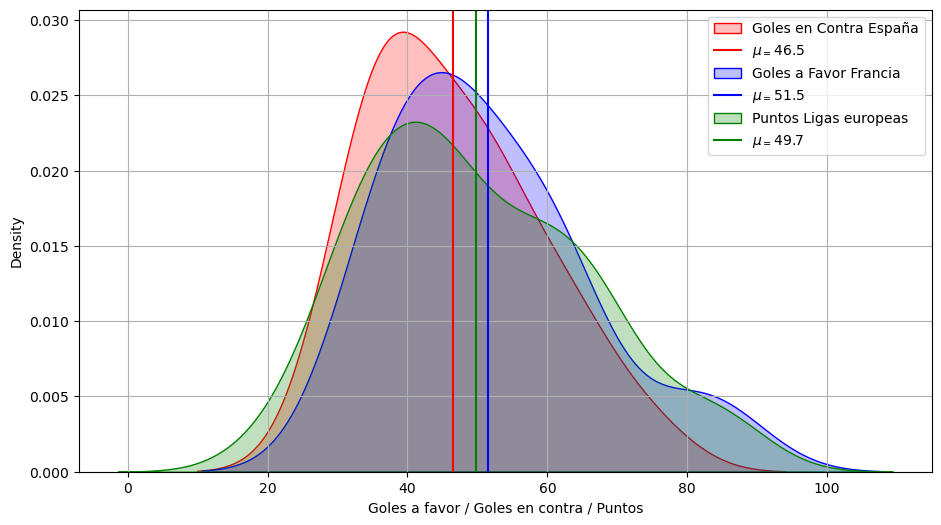

In [95]:
# Visualización de la distribución y sus respectivas medias

plt.figure(figsize=(11,6))

sns.kdeplot(Esp_GC, label= 'Goles en Contra España', color= 'red', fill = True)
plt.axvline(Esp_GC.mean(), color='red', label='$\mu_=$'f'${Esp_GC.mean()}$')


sns.kdeplot(Fra_GF, label= 'Goles a Favor Francia', color= 'blue', fill = True)
plt.axvline(Fra_GF.mean(), color='blue', label='$\mu_=$'f'${Fra_GF.mean()}$')


sns.kdeplot(EU_Pts, label= 'Puntos Ligas europeas', color= 'green', fill = True)
plt.axvline(EU_Pts.mean(), color='green', label='$\mu_=$'f'${EU_Pts.mean().round(1)}$')

plt.xlabel('Goles a favor / Goles en contra / Puntos')
plt.grid()
plt.legend()
plt.show()

Las tres variables tienen una distribución y media estadísticamente iguales. 